In [1]:
# When using Google Codlab. Import os to open the csv file from the google drive.
#import os
#from google.colab import drive
#drive.mount('/content/drive')  

Mounted at /content/drive


In [2]:
import re 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import html
import string
import nltk 
import itertools
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# read the genetic tweet sntiment data csv file
#tweet = pd.read_csv("/content/drive/MyDrive/sentiment_analysis.csv")
tweet = pd.read_csv("sentiment_analysis.csv")
tweet

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1
...,...,...,...
550386,8.046170e+17,@goddesses_o I can't stop watching her...mm. M...,0
550387,8.046180e+17,Poor old Tom Odell doesn't look like he would ...,0
550388,8.046180e+17,#antsmasher I smashed 7 ants in this awesome ...,1
550389,8.046180e+17,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1


In [4]:
# read the canadian election tweet sntiment data csv file
#elections = pd.read_csv("/content/drive/MyDrive/Canadian_elections_2019.csv")
elections = pd.read_csv("Canadian_elections_2019.csv")
elections

,sentiment,negative_reason,text
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ..."
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio..."
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO..."
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#..."
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h..."
...,...,...,...
2128,negative,Scandal,b'You know he was doing a good enough job smea...
2129,negative,Scandal,b'You missed the comment. Deflecting the issue...
2130,positive,NaN,b'Your daily reminder:\n@theJagmeetSingh endor...
2131,negative,Women Reproductive right and Racism,b'Yup...not going to reopen the abortion debat...


## Question 1: Data Cleaning

In [5]:
tweet_clean = tweet.copy()
elections_clean = elections.copy()

In [6]:
# whrite the function to remove \n in text column
def remove_n(text):
    text['text'] = text['text'].str.replace('\n', '')
    return text

In [7]:
# whrite the function to remove all punctuations only keep letter in text column
def remove_punctuations_hashtag(text):
    text['text'] = text['text'].str.replace("[^a-zA-Z]", " ")
    return text

In [8]:
# white the function to remove all stopwords in text column
def remove_stopwords(text):
    stop = stopwords.words('english')
    t = [t for t in text.split() if t not in stop]
    text = ' '.join(t)    
    return text

In [9]:
# white the function to fremove all non-ASII words
def remove_non_ASCII(text):
    
    printable = set(string.printable)
    text = ''.join(filter(lambda x: x in printable, text))
    return text

In [10]:
# Define the function  which combined basic text cleaning process
def data_cleaning1(text):    
    
    # All html tags and attributes are removed.
    text = re.sub(r'<[^>]+>', '', text)
    # Replacing the HTML character codes with ASCII equvivalent 
    text = html.unescape(text)
    # All URLs removed
    text = re.sub(r'http[s]?://\S+', '', text)
    # Remove the words after @
    text =  re.sub(r'@(?=\w+)\w+','', text)
    # Remove punctuations
    text =  re.sub(r'[^\w\s]','', text)
    # Remove all digital
    text = re.sub(r'\w*\d\w*', '', text)
    # Lower the text 
    text = text.lower()
    # Remove "rt"
    text = re.sub('rt', '',text) 
    # Remove "#"
    text = re.sub('#', '', text)

    return text
    

#### Clean the Generic Tweets data:

In [11]:
# Remove \n and apply data_cleaning1 function in genetic tweet file
tweet_clean = remove_n(tweet_clean)
tweet_clean.loc[:,"text"] = tweet_clean["text"].apply(lambda x:data_cleaning1(x))

tweet_clean.head()

,ID,text,label
0,7.680980e+17,josh jenkins is looking forward to tab breeder...,1
1,7.680980e+17,congratulations pakistan on becoming in the...,1
2,7.680980e+17,this september is taking you to maine mendo...,1
3,7.680980e+17,newly painted walls thanks a million to our ...,1
4,7.680980e+17,excited to announce as of july feschotte la...,1


In [12]:
tweet_clean.loc[:,"text"] = tweet_clean["text"].apply(lambda x:remove_non_ASCII(x))

tweet_clean.head()

,ID,text,label
0,7.680980e+17,josh jenkins is looking forward to tab breeder...,1
1,7.680980e+17,congratulations pakistan on becoming in the...,1
2,7.680980e+17,this september is taking you to maine mendo...,1
3,7.680980e+17,newly painted walls thanks a million to our ...,1
4,7.680980e+17,excited to announce as of july feschotte la...,1


In [13]:
tweet_clean.loc[:,"text"] = tweet_clean["text"].apply(lambda x:remove_stopwords(x))

tweet_clean.head()

,ID,text,label
0,7.680980e+17,josh jenkins looking forward tab breeders crow...,1
1,7.680980e+17,congratulations pakistan becoming world odds j...,1
2,7.680980e+17,september taking maine mendozas surprise thank...,1
3,7.680980e+17,newly painted walls thanks million custodial p...,1
4,7.680980e+17,excited announce july feschotte lab relocating...,1


#### Clean the Canadian Elections Tweets data:

In [14]:
# Define the second text clean function for election data
def data_cleaning2(text):    
    # All html tags and attributes are removed.
    text = re.sub(r'<[^>]+>', '', text)
    # Replacing the HTML character codes with ASCII equvivalent
    text = html.unescape(text)
    # All URLs removed
    text = re.sub(r'http[s]?://\S+', '', text)
    # Lower the text 
    text = text.lower()    
    # Remove the words after @
    text =  re.sub(r'@(?=\w+)\w+','', text)

    return text
# Define the punctuations remove function and keep "#"
def remove__punct(text):
    text['text'] = text['text'].str.replace("[^a-zA-Z#]", " ") 
    return text

In [15]:
elections_clean = remove_n(elections_clean)
elections_clean.loc[:,"text"] = elections_clean["text"].apply(lambda x:data_cleaning2(x))
elections_clean.loc[:,'text'] = elections_clean['text'].apply(lambda x: x[1:])
elections_clean = remove__punct(elections_clean)
elections_clean.loc[:,'text'] = elections_clean['text'].apply(lambda x: remove_stopwords(x))

elections_clean.head()

,sentiment,negative_reason,text
0,negative,Women Reproductive right and Racism,instead suggestion agree #canadian #women trus...
1,positive,NaN,#allwomanspacewalk real n n#etobicokenorth #ci...
2,negative,Economy,#brantford going cost billion next years ask j...
3,positive,NaN,#canada #canadaelection #canadavotes n#elxn n ...
4,negative,Economy,#canada #taxpayers sick tired hard earned dona...


#### Discussion:

For the cata cleaning process: I selected all stop words from the package (nltk.corpus), this selection may have an impact on future analysis results. After the cleaning process for genetic tweet data All html tags, attributes and URLs are removed, and all text are in lowercase.Unlike the genetic data, the cleaned election tweet data keeped the punctuation "#" and the words after "#", which is hashtag and be used in the future analyzation.

## Question 2: Exploratory analysis

#### Hashtag analyzation about the Canadian election data

For the exploratory analysis, the hashtag words after "#" is important in NLP, which shows people intersting topic. Therefore, the hashtag analyzation is very important in tweet NLP.

In [16]:
# change the positive to 1 and negative to 0 in canadian election sentiment coloumn
elections_clean.loc[:,'sentiment'] = elections_clean['sentiment'].replace({'positive': 1, 'negative': 0})
elections_clean

,sentiment,negative_reason,text
0,0,Women Reproductive right and Racism,instead suggestion agree #canadian #women trus...
1,1,NaN,#allwomanspacewalk real n n#etobicokenorth #ci...
2,0,Economy,#brantford going cost billion next years ask j...
3,1,NaN,#canada #canadaelection #canadavotes n#elxn n ...
4,0,Economy,#canada #taxpayers sick tired hard earned dona...
...,...,...,...
2128,0,Scandal,know good enough job smearing campaign right #...
2129,0,Scandal,missed comment deflecting issue answer best re...
2130,1,NaN,daily reminder n endorses strategic voting n#e...
2131,0,Women Reproductive right and Racism,yup going reopen abortion debate xf x f x x f ...


In [17]:
# Define a function to pick hashtag words after "#"
def hashtags_words(text):
    text = re.findall(r'#(\w+)',text)
    return text 

In [18]:
# select all hasgtag words form the election data and report their frequency distribution
hashtags = elections_clean["text"].apply(lambda x:hashtags_words(x))
hashtags_list = list(itertools.chain.from_iterable(hashtags))
hashtags_fre = nltk.FreqDist(hashtags_list)
hashtags_fre

FreqDist({'canadian': 4,
          'women': 1,
          'andrewscheer': 22,
          'conservatives': 9,
          'cdnpoli': 1159,
          'elxn': 2191,
          'canada': 60,
          'abortion': 4,
          'allwomanspacewalk': 1,
          'etobicokenorth': 3,
          'cityofto': 1,
          'onpoli': 41,
          'brantford': 2,
          'canadaelection': 12,
          'canadavotes': 65,
          'taxpayers': 1,
          'trudeaumustgo': 75,
          'snclavalinscandal': 7,
          'election': 21,
          'blastfromthepast': 1,
          'gunlobby': 1,
          'cdnmedia': 36,
          'ppc': 68,
          'chooseforward': 164,
          'cpckinsellagate': 4,
          'voteliberal': 12,
          'lpc': 26,
          'icymi': 2,
          'analysis': 2,
          'vote': 34,
          'etobicoke': 2,
          'etobto': 2,
          'kinsella': 20,
          'cpc': 89,
          'lyingandy': 10,
          'snclavalin': 3,
          'trump': 4,
          'yank

In [19]:
# Sorted the hashtag words counts and output a sorted hasgtag frequency dataframe 
# based on there too many words and I selected the hashtag whose frequency greater than 30
hashtags_selected = dict((k, v) for k, v in hashtags_fre.items() if int(v) >= 30)
hashtags_selected = dict(sorted(hashtags_selected.items(), key=lambda item: item[1],reverse=True ))
hashtags_array = pd.DataFrame({'hashtags': list(hashtags_selected.keys()),'Frequency': list(hashtags_selected.values())})   
hashtags_array

,hashtags,Frequency
0,elxn,2191
1,cdnpoli,1159
2,chooseforward,164
3,cpc,89
4,trudeaumustgo,75
5,cdnelxn,70
6,ppc,68
7,canadavotes,65
8,kinsellagate,63
9,canada,60


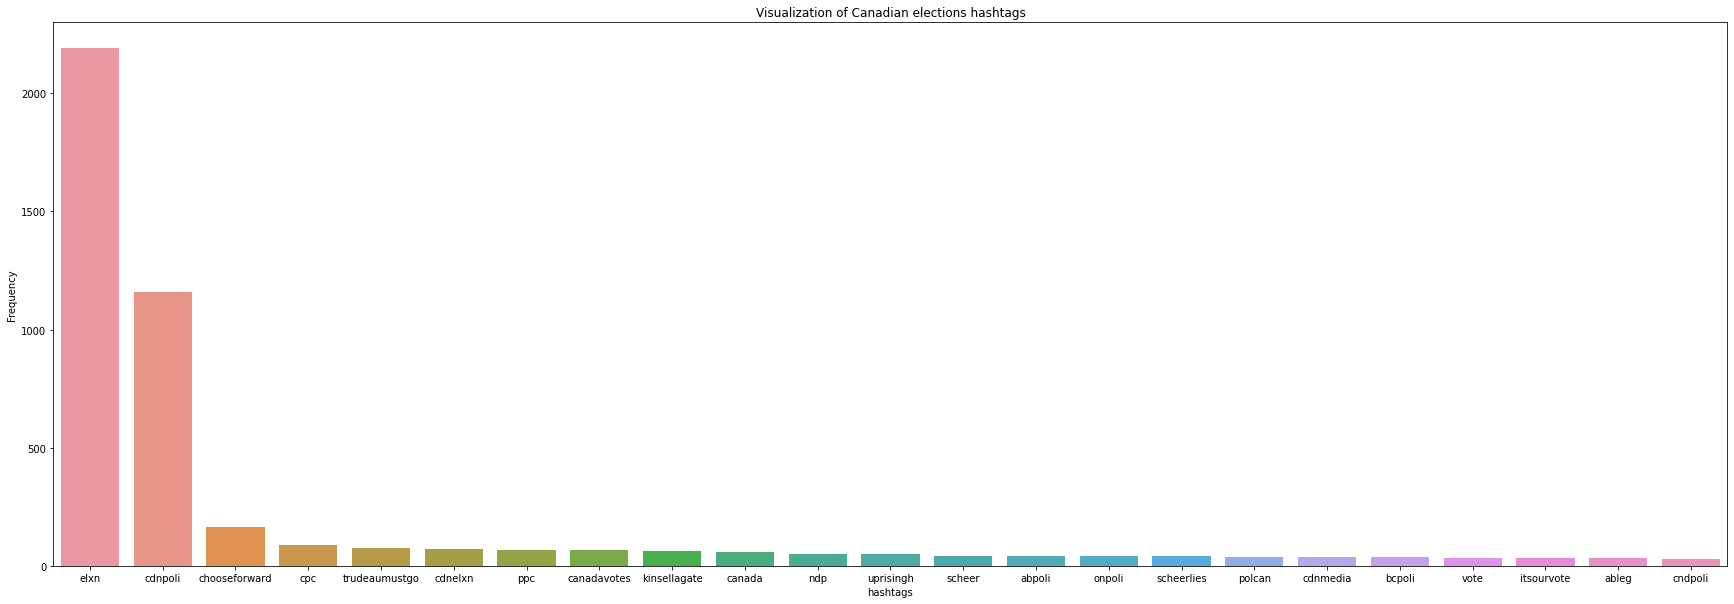

In [20]:
# plot the sorted frequency distribution bar figure about the selected hashtag data
plt.figure(figsize=(30,10))
sns.barplot(data=hashtags_array, x= "hashtags", y = "Frequency").set_title('Visualization of Canadian elections hashtags')
plt.show()

#### Result:
The plot shows the most popular and highest frequency hashtag words are elxn and cdnpoli which are far higher than others.

#### Negative and positive sentiment visualization of Canadian elections tweet keywords

This part will plot negative & positive sentiment words frequency distribution, and analyze the different between negative keywords and positive keywords.

In [21]:
# splite the Canadian elections dataset to negative and positive
P_elections_clean= elections_clean[elections_clean["sentiment"] == 1]
N_elections_clean= elections_clean[elections_clean["sentiment"] == 0]

In [22]:
# remove the punctuation "#" for both P & N dataset
P_elections_clean = remove_punctuations_hashtag(P_elections_clean)
N_elections_clean = remove_punctuations_hashtag(N_elections_clean)

In [23]:
# Select the 20 highest frequency positive words and report their sorted counts
top_N = 20
P_elections_sent = P_elections_clean['text'].str.cat(sep=' ')
P_words = nltk.tokenize.word_tokenize(P_elections_sent)
# only select the words has more than two letters
P_words_selected = [i for i in P_words if len(i) > 2]
P_words_dist = nltk.FreqDist(P_words_selected)
P_words_fre = pd.DataFrame(P_words_dist.most_common(top_N),
                    columns=['Positive_Word', 'Positive_Frequency'])

P_words_fre

,Positive_Word,Positive_Frequency
0,elxn,1152
1,cdnpoli,557
2,vote,207
3,election,154
4,canada,125
5,chooseforward,111
6,monday,110
7,ndp,82
8,party,73
9,scheer,70


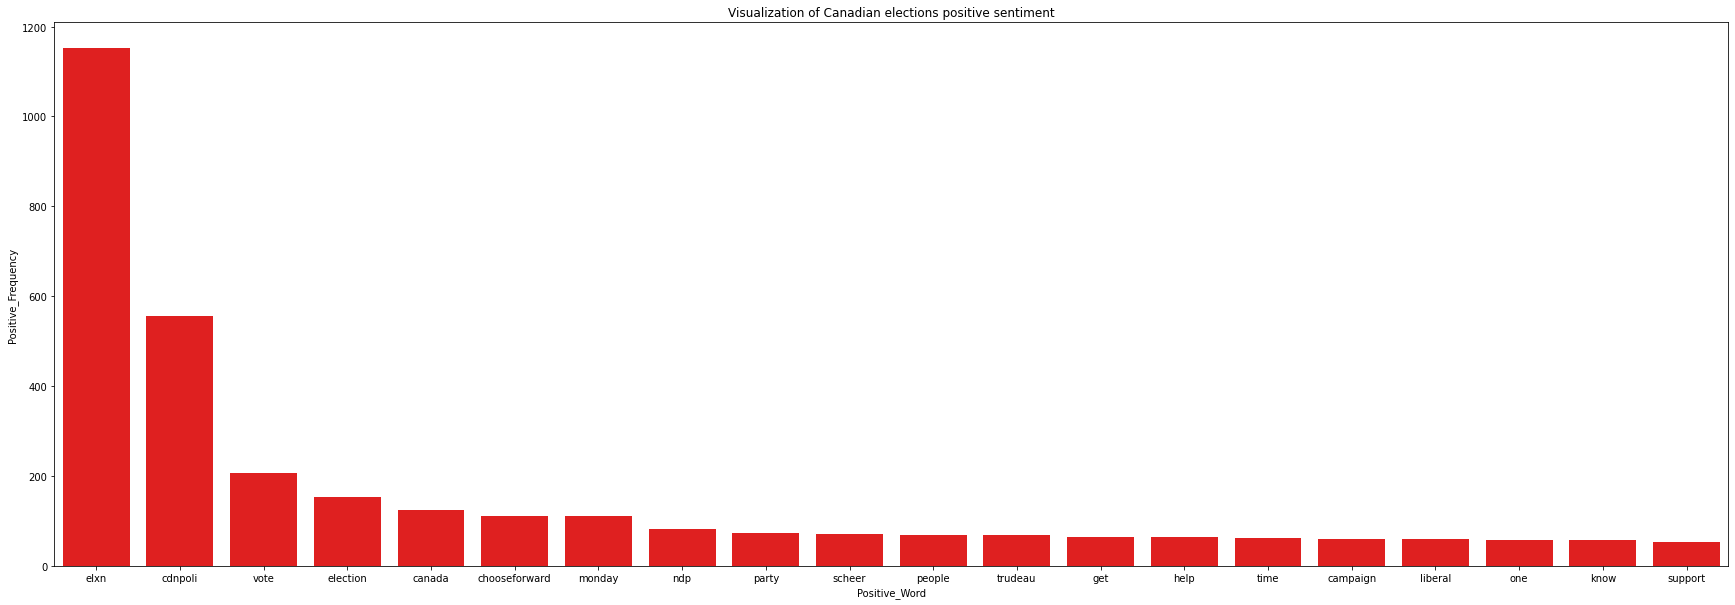

In [24]:
# plot the positive sentiment words frequency distribution
plt.figure(figsize=(30,10))
sns.barplot(data=P_words_fre, x= 'Positive_Word', y = 'Positive_Frequency', color = 'red').set_title('Visualization of Canadian elections positive sentiment')
plt.show()

In [25]:
# Select the 20 highest frequency negative words and report their sorted counts
top_N = 20
N_elections_sent = N_elections_clean['text'].str.cat(sep=' ')
N_words = nltk.tokenize.word_tokenize(N_elections_sent)
# only select the words has more than two letters
N_words_selected = [i for i in N_words if len(i) > 2]
N_words_dist = nltk.FreqDist(N_words_selected)
N_words_fre = pd.DataFrame(N_words_dist.most_common(top_N),
                    columns=['Negative_Word', 'Negative_Frequency'])
N_words_fre

,Negative_Word,Negative_Frequency
0,elxn,1043
1,cdnpoli,602
2,scheer,161
3,trudeau,128
4,canada,124
5,party,112
6,cpc,111
7,kinsella,94
8,like,83
9,vote,80


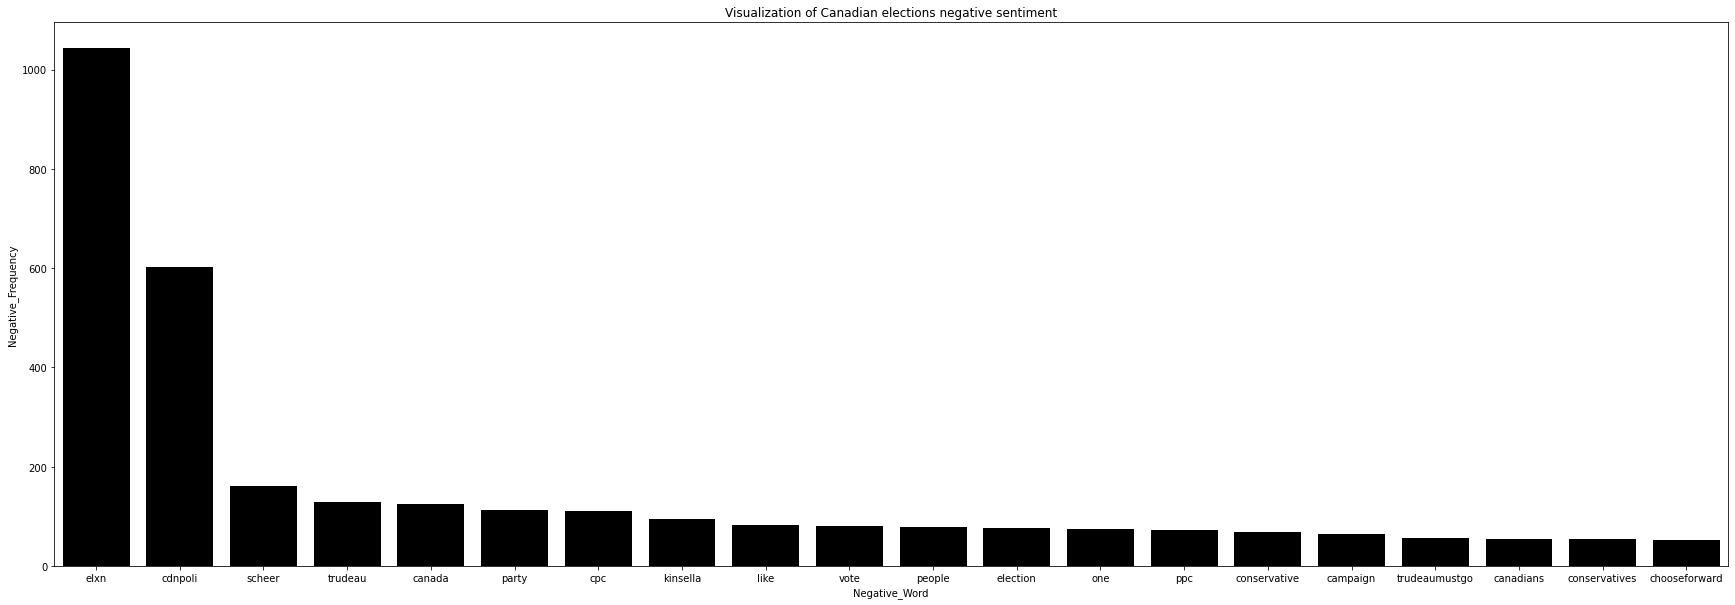

In [26]:
# plot the negative sentiment words frequency distribution
plt.figure(figsize=(30,10))
sns.barplot(data=N_words_fre, x= 'Negative_Word', y = 'Negative_Frequency', color = 'black').set_title('Visualization of Canadian elections negative sentiment')
plt.show()

#### Result:
These two distribution bar plot are similar, but in negative words distribution there are more words about parties.

#### Negative and Positive Words Frequency Cloud in Canadian election and genetic tweet data

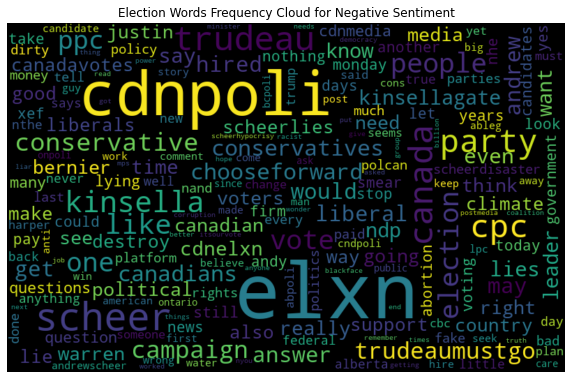

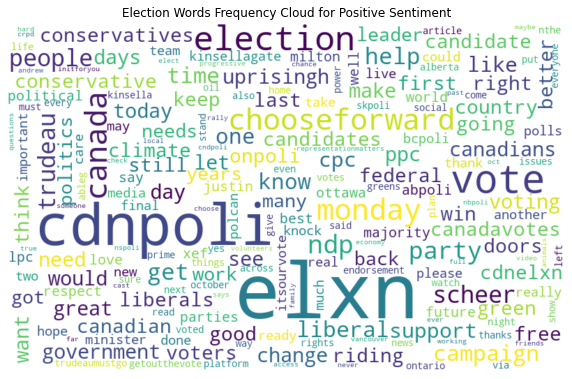

In [27]:
# use WorldCloud package to plot the cloud figure about canadian election sentiment
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(dict(N_words_dist))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Election Words Frequency Cloud for Negative Sentiment")
plt.axis('off')
plt.show()
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate_from_frequencies(dict(P_words_dist))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Election Words Frequency Cloud for Positive Sentiment")
plt.axis('off')
plt.show()

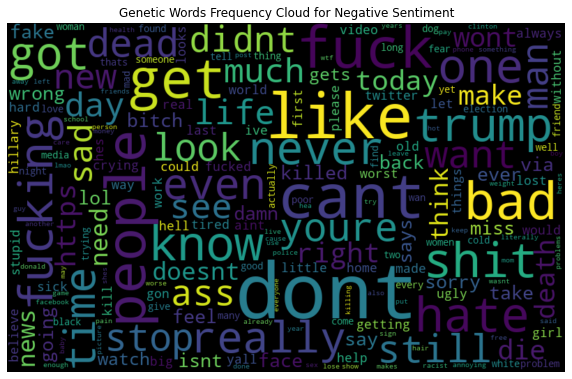

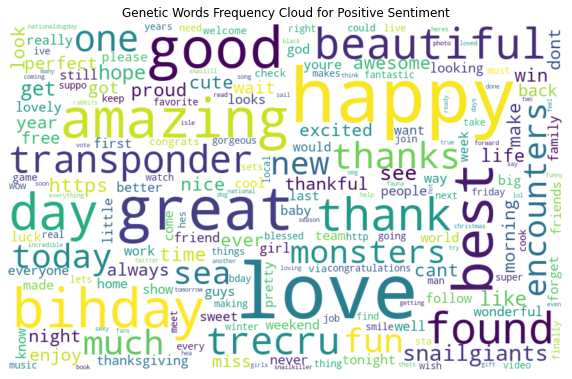

In [28]:
# Same as the previous process split and analyze the genetic tweet sentiment data
P_tweet_clean = tweet_clean[tweet_clean["label"]==1]
N_tweet_clean = tweet_clean[tweet_clean["label"]==0]
P_tweet_clean = remove_punctuations_hashtag(P_tweet_clean)
N_tweet_clean = remove_punctuations_hashtag(N_tweet_clean)

P_tweet_sent = P_tweet_clean['text'].str.cat(sep=' ')
P_tweet_words = nltk.tokenize.word_tokenize(P_tweet_sent)
P_tweet_words_selected = [i for i in P_tweet_words if len(i) > 2]
P_tweet_words_dist = nltk.FreqDist(P_tweet_words_selected)

N_tweet_sent = N_tweet_clean['text'].str.cat(sep=' ')
N_tweet_words = nltk.tokenize.word_tokenize(N_tweet_sent)
N_tweet_words_selected = [i for i in N_tweet_words if len(i) > 2]
N_tweet_words_dist = nltk.FreqDist(N_tweet_words_selected)
# use WorldCloud package to plot the cloud figure about genetic tweet sentiment
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(dict(N_tweet_words_dist))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Genetic Words Frequency Cloud for Negative Sentiment")
plt.axis('off')
plt.show()
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate_from_frequencies(dict(P_tweet_words_dist))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Genetic Words Frequency Cloud for Positive Sentiment")
plt.axis('off')
plt.show()

#### Discussion:

From the resouts of previous three distribution bar plot. We can find the top three hashtag words in canadian election is elxn, cdnpoli, and chooseforward. They all get over 100 times. Based on this result, we can see that most of tweets in canadina election data talk about elxn43th and canadian politics, people hope to change in this election.

From the positive and negative words distribution bar plot, we can find the top five frequency poitive words are: elxn, cdnpoli, vote, election, and canada. The top five frequency negative words are: elxn, cdnpoli, scheer, trudeau, and canada. Based on these results, we can find the sentiment are complex in this election. One side, most of people have positive attitude for the country and elections. However, lots of people have positive attitude for current political parties and other parties. 

Based on the resultd of four words cloud figures about genetic and canadian election tweet data. We can find the cloud figure is intuitive and good lookin.Larger size in the cloud figure means higher score. For these two election tweet figures, we can clear see the highest score words for both negative and positive are elxn and cdnpoli. For these two genetic tweet figures, the highest score negative words are: like, dont, cant, and bad. The highest score positive words are: happy, love, great, and amazing. The results are close to the real life which can see the data cleaning process is reliable.

#### Define the political party for all tweets in Canadian election data

First, I selected the follow key words to identify three political parties:

For Conservatives(cpc): 'cpc', 'scheer', 'andrew', 'andrew scheer','conservative','conservatives';

For Liberal: 'lpc','trudeau','trudeaumustgo','liberal','justin','justintrudeau','kinsella';

For ndp: 'ndp','ndc','democratic','jagmeet','singh','jagmeet singh'.
    
All these keywords beased on my personal thinking and looking for total words frequency result from the previous part. The identification keywords are not perfect. I can improve the future prediction accuracy by changing my party identification keywords.

In [29]:
# Define a function to identify party of each tweet text
def classify_political_party(text):
    # select the following key words to define three different parties
    cpc_list = ['cpc', 'scheer', 'andrew', 'andrew scheer','conservative','conservatives']
    liberal_list = ['lpc','trudeau','trudeaumustgo','liberal','justin','justintrudeau','kinsella']
    ndp_list = ['ndp','ndc','democratic','jagmeet','singh','jagmeet singh']
    
    count_dict = {'cpc':0,'liberal':0,'ndp':0}
    # for if loop to split parties based on the key words list
    for t in text.split():
        if t in cpc_list:
            count_dict['cpc']+=1
        
        if t in liberal_list:
            count_dict['liberal']+=1
        
        if t in ndp_list:
            count_dict['ndp']+=1
        
    # Choose the party with the highest number of the twitter party keywords
    max_list=[]
    max_value = max(count_dict.values())
    for m,n in count_dict.items():
        if n == max_value:
            max_list.append(m)
            
    # if no party key words or have same value of different party key words. name their party 'others'      
    if len(max_list) >1:
        return 'others'
    else:
        return max_list[0]

In [30]:
# remove the "#" from previous election clean dataframe
elections_clean = remove_punctuations_hashtag(elections_clean)
elections_clean['Party'] = elections_clean['text'].apply(lambda x:classify_political_party(x))
elections_clean

,sentiment,negative_reason,text,Party
0,0,Women Reproductive right and Racism,instead suggestion agree canadian women trus...,cpc
1,1,NaN,allwomanspacewalk real n n etobicokenorth ci...,others
2,0,Economy,brantford going cost billion next years ask j...,liberal
3,1,NaN,canada canadaelection canadavotes n elxn n ...,others
4,0,Economy,canada taxpayers sick tired hard earned dona...,liberal
...,...,...,...,...
2128,0,Scandal,know good enough job smearing campaign right ...,others
2129,0,Scandal,missed comment deflecting issue answer best re...,others
2130,1,NaN,daily reminder n endorses strategic voting n e...,others
2131,0,Women Reproductive right and Racism,yup going reopen abortion debate xf x f x x f ...,others


In [31]:
# report the distribution by party
party_df= pd.DataFrame(elections_clean['Party'].value_counts())
party_df

,Party
others,1402
cpc,338
liberal,301
ndp,92


#### Deeper analyzation of parties and sentiment distribution

Plot the simple parties frequency distribution daigram from the counts dataframe

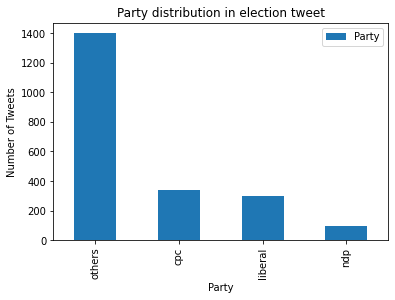

In [32]:
# plot the simple distribution daigram for different parties
party_df.plot.bar()
plt.xlabel('Party')  
plt.ylabel('Number of Tweets')
plt.title('Party distribution in election tweet')
plt.show()

Then, for the deeper analyzation, I split the previous election dataframe by two sentiment (P & N). Plot the party sentiment frequency distribution for future analyzation.

In [ ]:
# split the election data by positive sentiment and negative sentiment
positive_sentiment = elections_clean[elections_clean['sentiment'] == 1]
negative_sentiment = elections_clean[elections_clean['sentiment'] == 0]
positive_array = np.array(positive_sentiment['Party'].value_counts())
negative_array = np.array(negative_sentiment['Party'].value_counts())

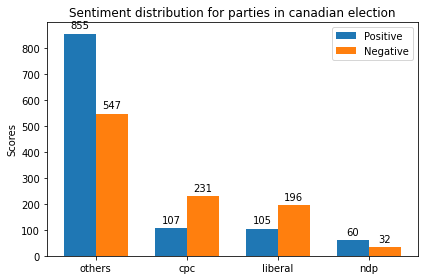

In [ ]:
# plot the positive and negative sentiment distribution for different parties in canadian election data
labels = ['others', 'cpc', 'liberal', 'ndp']
negative = negative_array
positive = positive_array

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, positive, width, label='Positive')
rects2 = ax.bar(x + width/2, negative, width, label='Negative')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Sentiment distribution for parties in canadian election')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
# define a function to display distribution score on each top of the bar
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

#### Discussion:

For answer the question: What can you say about the distribution of the political affiliations of the tweets?

From the firt political parties distributiin, the score of party "others" is far higher than our target parties. This can be caused by the party identification part, there are missing keywords for three political parties. Except this factor, based on the curent results, "cpc" and "liberal" have similar score value and "ndp" is lower. We can say the party "cpc" and "liberal" have higher attention and more powerful than the party "ndp".

From the second sentiment distribution bar figure, the result shows party "others" and "ndp" have higher positive score than negative. However, part "cpc" and "liberal" have higher negative score than negative. From the limited result, we can say people has more negative sentiment for "cpc" and "liberal". 

## Question 3: Model preparation

#### Text feature extraction for genetic tweet dataset

#### Build the future dataframe through Bag of Words methods (BW):

Based on the computer RAM limitation, I select 500 max features in future analyzation

In [ ]:
cv = CountVectorizer(max_features=500)
tweet_bw = cv.fit_transform(tweet_clean['text'])
words = cv.get_feature_names()
weight = tweet_bw.toarray()
tweet_bw_df = pd.DataFrame(weight, columns=words)
tweet_bw_final = pd.concat([tweet_clean,tweet_bw_df],axis=1)
tweet_bw_final

,ID,text,label,absolutely,actually,adorable,ago,aint,album,almost,already,also,always,amazing,america,another,anyone,anything,app,appreciate,around,ass,award,away,awesome,babe,baby,back,bad,bc,bday,beautiful,beauty,believe,best,better,big,bihday,bitch,black,bless,blessed,body,book,boy,boyfriend,boys,brilliant,bro,brother,business,buy,call,came,cant,car,care,case,cat,cause,celebrate,chance,change,check,children,christmas,city,class,click,clinton,coffee,cold,come,coming,congrats,congratulations,cook,cool,could,couldnt,country,couple,crazy,crying,cute,dad,damn,day,days,dead,deal,deals,dear,death,delicious,didnt,die,doesnt,dog,dogs,donald,done,dont,easy,eat,election,encounters,end,enjoy,enjoying,enough,even,evening,event,ever,every,everyone,everything,excited,exciting,eyes,fabulous,face,facebook,faces,fake,fall,family,fan,fans,fantastic,far,fashion,fauna,favorite,fear,feel,feeling,fight,finally,find,first,fit,follow,following,food,football,forever,forget,forward,found,free,friday,friend,friends,fuck,fucked,fucking,full,fun,funny,future,game,games,get,gets,getting,gift,girl,girls,give,giveaway,giving,glad,go,god,going,gonna,good,gorgeous,got,grateful,great,greatest,guy,guys,hair,hand,happy,hard,hate,hea,head,health,healthy,hell,hello,help,heres,hes,hey,hi,high,hillary,holiday,home,honestly,hope,hot,house,ht,htt,http,https,hu,huge,human,id,ill,im,incredible,inspiration,interesting,isle,isnt,ive,job,join,keep,kids,kill,killed,killing,kind,know,last,late,learn,leave,left,let,lets,life,like,lil,list,listen,literally,little,live,...,long,look,looking,looks,lose,lost,lot,lots,love,loved,lovely,loves,loving,luck,lucky,mad,made,make,makes,making,man,many,marketing,may,mean,media,meet,men,meteorite,might,mind,miss,mom,moment,monday,money,monsters,moon,morning,movie,much,music,must,name,national,nationaldogday,necklace,need,never,new,news,next,nice,night,nothing,oh,ok,okay,old,omg,one,online,open,pa,pain,parents,pay,people,perfect,person,phone,photo,photos,pic,pics,picture,pictures,place,play,playing,please,police,poor,porn,post,president,pretty,problem,proud,put,quote,rabbits,read,ready,real,really,reason,red,remember,retweet,right,sad,safe,said,sail,saturday,say,says,school,sea,season,see,seeing,seen,senior,service,set,sets,sex,sexy,share,shes,shit,show,shows,sick,sign,since,sister,site,sleep,smile,snailgiants,snailill,snailkiller,snapchat,social,someone,something,song,soon,sorry,special,sta,staed,star,stay,still,stop,story,students,stunning,stupid,success,summer,sunday,super,suppo,sure,sweet,take,taking,talk,team,tell,thank,thankful,thanks,thanksgiving,thats,theres,theyre,thing,things,think,though,thought,time,times,tips,tired,today,together,tomorrow,tonight,took,top,transponder,travel,trecru,true,trump,try,trying,tweet,twitter,two,ugly,ur,us,use,using,veterans,via,video,view,visit,vote,vs,wait,wanna,want,watch,watching,way,ways,week,weekend,weight,welcome,well,whats,white,whole,win,winter,wish,without,woman,women,wonderful,wont,words,work,working,world,worst,would,wow,wrong,ya,yall,year,years,yes,yesterday,yet,youll,young,youre
0,7.680980e+17,josh jenkins looking forward tab breeders crow...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

#### Build the future dataframe through TF-IDF method:

In [ ]:
tf_idf = TfidfVectorizer(max_features=500)
tweet_tf_idf = tf_idf.fit_transform(tweet_clean['text'])
words_tf_idf = tf_idf.get_feature_names()
weight_tf_idf = tweet_tf_idf.toarray()
tweet_tf_idf_df = pd.DataFrame(weight_tf_idf, columns=words_tf_idf)
tweet_tf_idf_final = pd.concat([tweet_clean,tweet_tf_idf_df],axis=1)
tweet_tf_idf_final

,ID,text,label,absolutely,actually,adorable,ago,aint,album,almost,already,also,always,amazing,america,another,anyone,anything,app,appreciate,around,ass,award,away,awesome,babe,baby,back,bad,bc,bday,beautiful,beauty,believe,best,better,big,bihday,bitch,black,bless,blessed,body,book,boy,boyfriend,boys,brilliant,bro,brother,business,buy,call,came,cant,car,care,case,cat,cause,celebrate,chance,change,check,children,christmas,city,class,click,clinton,coffee,cold,come,coming,congrats,congratulations,cook,cool,could,couldnt,country,couple,crazy,crying,cute,dad,damn,day,days,dead,deal,deals,dear,death,delicious,didnt,die,doesnt,dog,dogs,donald,done,dont,easy,eat,election,encounters,end,enjoy,enjoying,enough,even,evening,event,ever,every,everyone,everything,excited,exciting,eyes,fabulous,face,facebook,faces,fake,fall,family,fan,fans,fantastic,far,fashion,fauna,favorite,fear,feel,feeling,fight,finally,find,first,fit,follow,following,food,football,forever,forget,forward,found,free,friday,friend,friends,fuck,fucked,fucking,full,fun,funny,future,game,games,get,gets,getting,gift,girl,girls,give,giveaway,giving,glad,go,god,going,gonna,good,gorgeous,got,grateful,great,greatest,guy,guys,hair,hand,happy,hard,hate,hea,head,health,healthy,hell,hello,help,heres,hes,hey,hi,high,hillary,holiday,home,honestly,hope,hot,house,ht,htt,http,https,hu,huge,human,id,ill,im,incredible,inspiration,interesting,isle,isnt,ive,job,join,keep,kids,kill,killed,killing,kind,know,last,late,learn,leave,left,let,lets,life,like,lil,list,listen,literally,little,live,...,long,look,looking,looks,lose,lost,lot,lots,love,loved,lovely,loves,loving,luck,lucky,mad,made,make,makes,making,man,many,marketing,may,mean,media,meet,men,meteorite,might,mind,miss,mom,moment,monday,money,monsters,moon,morning,movie,much,music,must,name,national,nationaldogday,necklace,need,never,new,news,next,nice,night,nothing,oh,ok,okay,old,omg,one,online,open,pa,pain,parents,pay,people,perfect,person,phone,photo,photos,pic,pics,picture,pictures,place,play,playing,please,police,poor,porn,post,president,pretty,problem,proud,put,quote,rabbits,read,ready,real,really,reason,red,remember,retweet,right,sad,safe,said,sail,saturday,say,says,school,sea,season,see,seeing,seen,senior,service,set,sets,sex,sexy,share,shes,shit,show,shows,sick,sign,since,sister,site,sleep,smile,snailgiants,snailill,snailkiller,snapchat,social,someone,something,song,soon,sorry,special,sta,staed,star,stay,still,stop,story,students,stunning,stupid,success,summer,sunday,super,suppo,sure,sweet,take,taking,talk,team,tell,thank,thankful,thanks,thanksgiving,thats,theres,theyre,thing,things,think,though,thought,time,times,tips,tired,today,together,tomorrow,tonight,took,top,transponder,travel,trecru,true,trump,try,trying,tweet,twitter,two,ugly,ur,us,use,using,veterans,via,video,view,visit,vote,vs,wait,wanna,want,watch,watching,way,ways,week,weekend,weight,welcome,well,whats,white,whole,win,winter,wish,without,woman,women,wonderful,wont,words,work,working,world,worst,would,wow,wrong,ya,yall,year,years,yes,yesterday,yet,youll,young,youre
0,7.680980e+17,josh jenkins looking forward tab breeders crow...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.512598,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

#### Split the genetic tweets dataset into train and test sets. Try seven different classification algorithms to predict genetic tweet sentiment with two feature extraction methods:

In [ ]:
# BW
X_bw_train, X_bw_test, y_bw_train, y_bw_test = train_test_split(tweet_bw_df,tweet_bw_final['label'],test_size=0.3,random_state=10)

In [ ]:
#TF-IDF
X_tf_train, X_tf_test, y_tf_train, y_tf_test = train_test_split(tweet_tf_idf_df,tweet_tf_idf_final['label'],test_size=0.3,random_state=10)

Try logistic regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
# for bag of words 
log_bw = LogisticRegression()
log_bw.fit(X_bw_train, y_bw_train)
predicted_lg_bw = log_bw.predict(X_bw_test)
print("Training accuracy of bw genetic:", log_bw.score(X_bw_train, y_bw_train))
print("Testing accuracy of bw genetic:", log_bw.score(X_bw_test, y_bw_test))
print(classification_report(y_bw_test,predicted_lg_bw)) 

Training accuracy of bw genetic: 0.9181541400513402
Testing accuracy of bw genetic: 0.9168231204350827
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     53526
           1       0.96      0.91      0.94    111592

    accuracy                           0.92    165118
   macro avg       0.90      0.92      0.91    165118
weighted avg       0.92      0.92      0.92    165118



In [ ]:
# for TF-IDF 
log_tf = LogisticRegression()
log_tf.fit(X_tf_train, y_tf_train)
predicted_lg_tf = log_bw.predict(X_tf_test)
print("Training accuracy of tf genetic:", log_tf.score(X_tf_train, y_tf_train))
print("Testing accuracy of tf genetic:", log_tf.score(X_tf_test, y_tf_test))
print(classification_report(y_tf_test,predicted_lg_tf)) 

Training accuracy of tf genetic: 0.9171392752671482
Testing accuracy of tf genetic: 0.9157087658522995
              precision    recall  f1-score   support

           0       0.79      0.96      0.86     53526
           1       0.98      0.88      0.92    111592

    accuracy                           0.90    165118
   macro avg       0.88      0.92      0.89    165118
weighted avg       0.92      0.90      0.90    165118



Try KNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k =100
print("For k is 100:")
# for bag of words    
classifier_bw = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
classifier_bw.fit(X_bw_train, y_bw_train)
predicted_knn_bw = classifier_bw.predict(X_bw_test[:10000])

print("Training accuracy of bw genetic:", classifier_bw.score(X_bw_train[:10000], y_bw_train[:10000]))
print("Testing accuracy of bw genetic:", classifier_bw.score(X_bw_test[:10000], y_bw_test[:10000]))
print(classification_report(y_bw_test[:10000],predicted_knn_bw))    

For k is 100:
Training accuracy of bw genetic: 0.892
Testing accuracy of bw genetic: 0.8905
              precision    recall  f1-score   support

           0       0.76      0.95      0.85      3214
           1       0.98      0.86      0.91      6786

    accuracy                           0.89     10000
   macro avg       0.87      0.91      0.88     10000
weighted avg       0.91      0.89      0.89     10000



In [ ]:
# for TF-IDF     
classifier_tf = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
classifier_tf.fit(X_tf_train, y_tf_train)
predicted_knn_tf = classifier_tf.predict(X_tf_test[:10000])

print("Training accuracy of tf genetic:", classifier_tf.score(X_tf_train[:10000], y_tf_train[:10000]))
print("Testing accuracy of tf genetic:", classifier_tf.score(X_tf_test[:10000], y_tf_test[:10000]))
print(classification_report(y_tf_test[:10000],predicted_knn_tf))   

Training accuracy of tf genetic: 0.8389
Testing accuracy of tf genetic: 0.8284
              precision    recall  f1-score   support

           0       0.68      0.89      0.77      3214
           1       0.94      0.80      0.86      6786

    accuracy                           0.83     10000
   macro avg       0.81      0.84      0.82     10000
weighted avg       0.85      0.83      0.83     10000



Try Naive Bayes:

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# for bag of words
NB_bw = MultinomialNB()
NB_bw.fit(X_bw_train, y_bw_train)
predicted_NB_bw = NB_bw.predict(X_bw_test)

print("Training accuracy of bw genetic:", NB_bw.score(X_bw_train, y_bw_train))
print("Testing accuracy of bw genetic:", NB_bw.score(X_bw_test, y_bw_test))
print(classification_report(y_bw_test,predicted_NB_bw)) 

Training accuracy of bw genetic: 0.8716079247702279
Testing accuracy of bw genetic: 0.8712012015649414
              precision    recall  f1-score   support

           0       0.86      0.72      0.78     53526
           1       0.88      0.94      0.91    111592

    accuracy                           0.87    165118
   macro avg       0.87      0.83      0.85    165118
weighted avg       0.87      0.87      0.87    165118



In [ ]:
# for TF-IDF
NB_tf = MultinomialNB()
NB_tf.fit(X_tf_train, y_tf_train)
predicted_NB_tf = NB_tf.predict(X_tf_test)

print("Training accuracy of tf genetic:", NB_tf.score(X_tf_train, y_tf_train))
print("Testing accuracy of tf genetic:", NB_tf.score(X_tf_test, y_tf_test))
print(classification_report(y_tf_test,predicted_NB_tf)) 

Training accuracy of tf genetic: 0.8664271828028437
Testing accuracy of tf genetic: 0.8666650516600249
              precision    recall  f1-score   support

           0       0.90      0.66      0.76     53526
           1       0.86      0.96      0.91    111592

    accuracy                           0.87    165118
   macro avg       0.88      0.81      0.84    165118
weighted avg       0.87      0.87      0.86    165118



Try SVM:

In [ ]:
from sklearn.svm import SVC
# for bag of words
svc_bw = SVC(kernel='linear',max_iter=500)
svc_bw.fit(X_bw_train, y_bw_train)
predicted_svc_bw = svc_bw.predict(X_bw_test)
print("Training accuracy of bw genetic:", svc_bw.score(X_bw_train, y_bw_train))
print("Testing accuracy of bw genetic:", svc_bw.score(X_bw_test, y_bw_test))
print(classification_report(y_bw_test,predicted_svc_bw)) 

Training accuracy of bw genetic: 0.6870634588979763
Testing accuracy of bw genetic: 0.6888649329570368
              precision    recall  f1-score   support

           0       0.58      0.15      0.24     53526
           1       0.70      0.95      0.80    111592

    accuracy                           0.69    165118
   macro avg       0.64      0.55      0.52    165118
weighted avg       0.66      0.69      0.62    165118



In [ ]:
# for TF-IDF
svc_tf = SVC(kernel='linear',max_iter=500)
svc_tf.fit(X_tf_train, y_tf_train)
predicted_svc_tf = svc_tf.predict(X_tf_test)
print("Training accuracy of tf genetic:", svc_tf.score(X_tf_train, y_tf_train))
print("Testing accuracy of tf genetic:", svc_tf.score(X_tf_test, y_tf_test))
print(classification_report(y_tf_test,predicted_svc_tf)) 

Training accuracy of tf genetic: 0.7075658039883407
Testing accuracy of tf genetic: 0.7084690948291524
              precision    recall  f1-score   support

           0       0.63      0.25      0.35     53526
           1       0.72      0.93      0.81    111592

    accuracy                           0.71    165118
   macro avg       0.67      0.59      0.58    165118
weighted avg       0.69      0.71      0.66    165118



Try Decision Trees:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# for bag of words
dt_bw = DecisionTreeClassifier()
dt_bw.fit(X_bw_train, y_bw_train)
predicted_dt_bw = dt_bw.predict(X_bw_test)
print("Training accuracy of bw genetic:", dt_bw.score(X_bw_train, y_bw_train))
print("Testing accuracy of bw genetic:", dt_bw.score(X_bw_test, y_bw_test))
print(classification_report(y_bw_test,predicted_dt_bw)) 

Training accuracy of bw genetic: 0.9620632642308181
Testing accuracy of bw genetic: 0.9115844426410203
              precision    recall  f1-score   support

           0       0.83      0.91      0.87     53526
           1       0.95      0.91      0.93    111592

    accuracy                           0.91    165118
   macro avg       0.89      0.91      0.90    165118
weighted avg       0.91      0.91      0.91    165118



In [ ]:
# for TF-IDF
dt_tf = DecisionTreeClassifier()
dt_tf.fit(X_tf_train, y_tf_train)
predicted_dt_tf = dt_tf.predict(X_tf_test)
print("Training accuracy of tf genetic:", dt_tf.score(X_tf_train, y_tf_train))
print("Testing accuracy of tf genetic:", dt_tf.score(X_tf_test, y_tf_test))
print(classification_report(y_tf_test,predicted_dt_tf)) 

Training accuracy of tf genetic: 0.961814090268459
Testing accuracy of tf genetic: 0.9125958405503942
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     53526
           1       0.95      0.92      0.93    111592

    accuracy                           0.91    165118
   macro avg       0.90      0.91      0.90    165118
weighted avg       0.92      0.91      0.91    165118



Try Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# for bag of words
rf_bw = RandomForestClassifier()
rf_bw.fit(X_bw_train, y_bw_train)
predicted_rf_bw = rf_bw.predict(X_bw_test)
print("Training accuracy of bw genetic:", rf_bw.score(X_bw_train, y_bw_train))
print("Testing accuracy of bw genetic:", rf_bw.score(X_bw_test, y_bw_test))
print(classification_report(y_bw_test,predicted_rf_bw)) 

Training accuracy of bw genetic: 0.9620554775444944
Testing accuracy of bw genetic: 0.9209534999212684
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     53526
           1       0.96      0.92      0.94    111592

    accuracy                           0.92    165118
   macro avg       0.91      0.92      0.91    165118
weighted avg       0.92      0.92      0.92    165118



In [ ]:
# for TF-IDF
rf_tf = RandomForestClassifier()
rf_tf.fit(X_tf_train, y_tf_train)
predicted_rf_tf = rf_tf.predict(X_tf_test)
print("Training accuracy of tf genetic:", rf_tf.score(X_tf_train, y_tf_train))
print("Testing accuracy of tf genetic:", rf_tf.score(X_tf_test, y_tf_test))
print(classification_report(y_tf_test,predicted_rf_tf)) 

Training accuracy of tf genetic: 0.9618011124579194
Testing accuracy of tf genetic: 0.9234123475332793
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     53526
           1       0.96      0.93      0.94    111592

    accuracy                           0.92    165118
   macro avg       0.91      0.92      0.91    165118
weighted avg       0.93      0.92      0.92    165118



Try XGBoost:

In [ ]:
from xgboost import XGBClassifier
# for bag of words
xgb_bw = XGBClassifier()
xgb_bw.fit(X_bw_train, y_bw_train)
predicted_xgb_bw = xgb_bw.predict(X_bw_test)
print("Training accuracy of bw genetic:", xgb_bw.score(X_bw_train, y_bw_train))
print("Testing accuracy of bw genetic:", xgb_bw.score(X_bw_test, y_bw_test))
print(classification_report(y_bw_test,predicted_xgb_bw)) 

Training accuracy of bw genetic: 0.8492445616484934
Testing accuracy of bw genetic: 0.847648348453833
              precision    recall  f1-score   support

           0       0.69      0.97      0.81     53526
           1       0.98      0.79      0.87    111592

    accuracy                           0.85    165118
   macro avg       0.84      0.88      0.84    165118
weighted avg       0.89      0.85      0.85    165118



In [ ]:
# for TF-IDF
from xgboost import XGBClassifier
xgb_tf = XGBClassifier()
xgb_tf.fit(X_tf_train, y_tf_train)
predicted_xgb_tf = xgb_tf.predict(X_tf_test)
print("Training accuracy of tf genetic:", xgb_tf.score(X_tf_train, y_tf_train))
print("Testing accuracy of tf genetic:", xgb_tf.score(X_tf_test, y_tf_test))
print(classification_report(y_tf_test,predicted_xgb_tf)) 

Training accuracy of tf genetic: 0.8518816527501278
Testing accuracy of tf genetic: 0.8498346636950544
              precision    recall  f1-score   support

           0       0.69      0.96      0.81     53526
           1       0.98      0.80      0.88    111592

    accuracy                           0.85    165118
   macro avg       0.84      0.88      0.84    165118
weighted avg       0.89      0.85      0.85    165118



#### Select the best model for genetic tweet sentiment prediction

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
def rf_tunning(X_train,y_train,X_test,y_test): 

    # Maximum number of levels in tree
    max_depth = [20, 50, 100, 200, 500]
    # Minimum number of samples required to split a node
    min_samples_split = [1, 5, 10, 20, 50]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 3, 4, 5]
    # Max features to consider when looking for the best split
    max_features = ['auto','sqrt']
    # Method of selecting samples for training each tree
    random_grid = {'max_depth': max_depth,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rf = RandomForestClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(rf, random_grid, cv = 10, verbose=2, random_state=10, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(X_train,y_train)
    best_rf = rf_random.best_estimator_
    predicted_rf_random= rf_random.predict(X_test)
    print('Best parameters found by randomised search:', rf_random.best_params_)

In [ ]:
rf_tunning(X_bw_train[:10000],y_bw_train[:10000],X_bw_test[:10000],y_bw_test[:10000])

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.8min finished


Best parameters found by randomised search: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 200}


In [ ]:
rf_tunning(X_tf_train[:10000],y_tf_train[:10000],X_tf_test[:10000],y_tf_test[:10000])

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.1min finished


Best parameters found by randomised search: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 200}


#### Discussion:
Before the hyperparameter tunnig process. Based on the accuracy results for the 14 predication models, the best model is RandomForestClassifier with TF-IDF features, and the best testing accuracy is 0.923. I select 'testing accuracy' as the key factor to compare performance with different models.

Then, do the hyperparameter tunning at RandomForestClassifier with both two feature dataframes. The best parameter results for two features are same, which is: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 200}. The best model will be used in future election prediction.


## Question 4: Model implementation and tuning


Based on the 14 models applied in genetic tweet data, the best model with highest testing accuracy is Random Forest model with TF-IDF

#### Predict Canadian election sentiment with best genetic tweet trained model

In [33]:
# build bag of words in election
cv = CountVectorizer(max_features=500)
elections_bw = cv.fit_transform(elections_clean['text'])
elections_words = cv.get_feature_names()
elections_weight = elections_bw.toarray()
elections_bw_df = pd.DataFrame(elections_weight, columns=elections_words)
elections_bw_final = pd.concat([elections_clean,elections_bw_df],axis=1)
# build TF-IDF in election
tf_idf = TfidfVectorizer(max_features=500)
elections_tf_idf = tf_idf.fit_transform(elections_clean['text'])
elections_words_tf_idf = tf_idf.get_feature_names()
elections_weight_tf_idf = elections_tf_idf.toarray()
elections_tf_idf_df = pd.DataFrame(elections_weight_tf_idf, columns=elections_words_tf_idf)
elections_tf_idf_final = pd.concat([elections_clean,elections_tf_idf_df],axis=1)

#### Try to predict election sentiment by model trained by election taining data:

Split the election data with two feature methods

In [34]:
# BW
X_BW1_train, X_BW1_test, y_BW1_train, y_BW1_test = train_test_split(elections_bw_df,elections_bw_final['sentiment'],test_size=0.3,random_state=10)
#TF-IDF
X_TF1_train, X_TF1_test, y_TF1_train, y_TF1_test = train_test_split(elections_tf_idf_df,elections_tf_idf_final['sentiment'],test_size=0.3,random_state=10)

RandomForestClassifier:

In [35]:
# for bag of words
from sklearn.ensemble import RandomForestClassifier
rf_BW = RandomForestClassifier()
rf_BW.fit(X_BW1_train, y_BW1_train)
predicted_rf_BW = rf_BW.predict(X_BW1_test)
print("Training accuracy of bw genetic:", rf_BW.score(X_BW1_train, y_BW1_train))
print("Testing accuracy of bw genetic:", rf_BW.score(X_BW1_test, y_BW1_test))
print(classification_report(y_BW1_test,predicted_rf_BW)) 

Training accuracy of bw genetic: 0.9919624916275954
Testing accuracy of bw genetic: 0.6875
              precision    recall  f1-score   support

           0       0.68      0.65      0.66       302
           1       0.70      0.72      0.71       338

    accuracy                           0.69       640
   macro avg       0.69      0.69      0.69       640
weighted avg       0.69      0.69      0.69       640



In [36]:
# for TF-IDF
rf_TF = RandomForestClassifier()
rf_TF.fit(X_TF1_train, y_TF1_train)
predicted_rf_TF = rf_TF.predict(X_TF1_test)
print("Training accuracy of tf genetic:", rf_TF.score(X_TF1_train, y_TF1_train))
print("Testing accuracy of tf genetic:", rf_TF.score(X_TF1_test, y_TF1_test))
print(classification_report(y_TF1_test,predicted_rf_TF)) 

Training accuracy of tf genetic: 0.9919624916275954
Testing accuracy of tf genetic: 0.6765625
              precision    recall  f1-score   support

           0       0.68      0.60      0.63       302
           1       0.67      0.75      0.71       338

    accuracy                           0.68       640
   macro avg       0.68      0.67      0.67       640
weighted avg       0.68      0.68      0.67       640



Logistic Regression:

In [37]:
from sklearn.linear_model import LogisticRegression
# for bag of words 
log_bw = LogisticRegression()
log_bw.fit(X_BW1_train, y_BW1_train)
predicted_lg_bw = log_bw.predict(X_BW1_test)
print("Training accuracy of bw genetic:", log_bw.score(X_BW1_train, y_BW1_train))
print("Testing accuracy of bw genetic:", log_bw.score(X_BW1_test, y_BW1_test))
print(classification_report(y_BW1_test,predicted_rf_BW)) 

Training accuracy of bw genetic: 0.8191560616208975
Testing accuracy of bw genetic: 0.690625
              precision    recall  f1-score   support

           0       0.68      0.65      0.66       302
           1       0.70      0.72      0.71       338

    accuracy                           0.69       640
   macro avg       0.69      0.69      0.69       640
weighted avg       0.69      0.69      0.69       640



In [38]:
# for TF-IDF 
log_tf = LogisticRegression()
log_tf.fit(X_TF1_train, y_TF1_train)
predicted_lg_tf = log_bw.predict(X_TF1_test)
print("Training accuracy of tf genetic:", log_tf.score(X_TF1_train, y_TF1_train))
print("Testing accuracy of tf genetic:", log_tf.score(X_TF1_test, y_TF1_test))
print(classification_report(y_TF1_test,predicted_rf_TF)) 

Training accuracy of tf genetic: 0.8057602143335566
Testing accuracy of tf genetic: 0.7109375
              precision    recall  f1-score   support

           0       0.68      0.60      0.63       302
           1       0.67      0.75      0.71       338

    accuracy                           0.68       640
   macro avg       0.68      0.67      0.67       640
weighted avg       0.68      0.68      0.67       640



#### Use genetice trained best model to predict the election sentiment

In [ ]:
# BW
X_election_bw = elections_bw_df
y_election_bw = elections_bw_final['sentiment']
#TF-IDF
X_election_tf = elections_tf_idf_df
y_election_tf = elections_tf_idf_final['sentiment']

In [ ]:
# TF-IDF
RF_best_model_tf = RandomForestClassifier(min_samples_split=10, min_samples_leaf=1, max_features='auto', max_depth=200)
RF_best_model_tf.fit(X_tf_train,y_tf_train)
best_predicted_rf_tf = RF_best_model_tf.predict(X_election_tf)
print("Testing accuracy of tf genetic:", RF_best_model_tf.score(X_election_tf, y_election_tf))
print(classification_report(y_election_tf,best_predicted_rf_tf))

Testing accuracy of bw genetic: 0.493202062822316
              precision    recall  f1-score   support

           0       0.46      0.49      0.47      1006
           1       0.52      0.50      0.51      1127

    accuracy                           0.49      2133
   macro avg       0.49      0.49      0.49      2133
weighted avg       0.49      0.49      0.49      2133



In [ ]:
# BW
RF_best_model_bw = RandomForestClassifier(min_samples_split=10, min_samples_leaf=1, max_features='auto', max_depth=200)
RF_best_model_bw.fit(X_bw_train,y_bw_train)
best_predicted_rf_bw = RF_best_model_bw.predict(X_election_bw)
print("Testing accuracy of bw genetic:", RF_best_model_bw.score(X_election_bw, y_election_bw))
print(classification_report(y_election_bw,best_predicted_rf_bw))

Testing accuracy of tf genetic: 0.493202062822316
              precision    recall  f1-score   support

           0       0.47      0.52      0.49      1006
           1       0.52      0.47      0.50      1127

    accuracy                           0.49      2133
   macro avg       0.49      0.49      0.49      2133
weighted avg       0.50      0.49      0.49      2133



#### Try other genetice trained models to predict the election sentiment

In [ ]:
from sklearn.linear_model import LogisticRegression
# for bag of words 
log_bw = LogisticRegression()
log_bw.fit(X_bw_train, y_bw_train)
predicted_lg_bw = log_bw.predict(X_election_bw)
print("Testing accuracy of bw genetic:", log_bw.score(X_election_bw, y_election_bw))
print(classification_report(y_election_bw,predicted_lg_bw))

Testing accuracy of bw genetic: 0.516643225503985
              precision    recall  f1-score   support

           0       0.49      0.44      0.46      1006
           1       0.54      0.59      0.56      1127

    accuracy                           0.52      2133
   macro avg       0.51      0.51      0.51      2133
weighted avg       0.51      0.52      0.51      2133



In [ ]:
log_tf = LogisticRegression()
log_tf.fit(X_tf_train, y_tf_train)
predicted_lg_tf = log_bw.predict(X_election_tf)
print("Testing accuracy of tf genetic:", log_tf.score(X_election_tf, y_election_tf))
print(classification_report(y_election_tf,predicted_lg_tf))

Testing accuracy of tf genetic: 0.49835911861228316
              precision    recall  f1-score   support

           0       0.47      0.58      0.52      1006
           1       0.53      0.42      0.47      1127

    accuracy                           0.49      2133
   macro avg       0.50      0.50      0.49      2133
weighted avg       0.50      0.49      0.49      2133



#### Reasult:

When fit election data with four simple classification model to predict the election sentiment, the highest prediction accuracy is 0.71 with logistic regression and TF-IDF feature. However, when I use genetic trained best model to predict the election sentiment, the prediction accuracy is 0.493 for both features. In addition, when I try other genetice trained models which is logistic regression to predict the election sentiment, the prediction accuracy is 0.517 which is higher than the best genetice trained model. 

Therefore, the genetic trained model is not fit well in election data. The accuracy from genetic trained model is far lower than election self trained model. In addition, the best genetice trained model is not the best model with other genetice data fitted model. 

#### visualize the sentiment prediction results and the true sentiment for each of the 3 parties/candidates.

In [ ]:
# true value:
# split election data by two sentiments
positive_sentiment = elections_clean[elections_clean['sentiment'] == 1]
negative_sentiment = elections_clean[elections_clean['sentiment'] == 0]
# report the sentiment counts for political parties
print("positive:\n", positive_sentiment['Party'].value_counts())
print("negative:\n", negative_sentiment['Party'].value_counts())

positive:
 others     855
cpc        107
liberal    105
ndp         60
Name: Party, dtype: int64
negative:
 others     547
cpc        231
liberal    196
ndp         32
Name: Party, dtype: int64


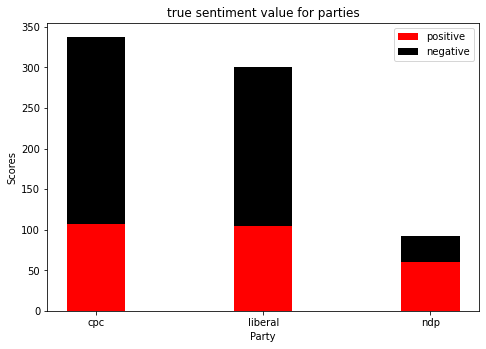

In [ ]:
# true sentiment value for parties
positive = (107,105,60)
negative = (231,196,32)
ind = ('cpc','liberal','ndp')
# select plot factors 
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, positive, width, color='r')
ax.bar(ind, negative, width, bottom = positive, color='black')

ax.set_ylabel('Scores')
ax.set_xlabel('Party')
ax.set_title('true sentiment value for parties')
ax.set_xticks(ind, ('cpc','liberal','ndp'))
ax.legend(labels=['positive', 'negative'])
plt.show()

In [ ]:
# predict election sentiment by genetic trained best model
# using TF-IDF features 
from sklearn.ensemble import RandomForestClassifier

X_party = elections_tf_idf_df
y_party = elections_tf_idf_final[['sentiment','Party']]

# Apply the best genetic prediction model 
rf_best = RandomForestClassifier(min_samples_split=10, min_samples_leaf=1, max_features='auto', max_depth=200)
rf_best.fit(X_tf_train, y_tf_train)

predicted_sentiment_train = rf_best.predict(X_party)

X_party['sentiment'] = predicted_sentiment_train
Party_train_df = pd.concat([X_party['sentiment'], y_party['Party']], axis=1)

In [ ]:
Train_positive_sentiment = Party_train_df[Party_train_df['sentiment'] == 1]
Train_negative_sentiment = Party_train_df[Party_train_df['sentiment'] == 0]
print("positive:\n", Train_positive_sentiment['Party'].value_counts())
print("negative:\n", Train_negative_sentiment['Party'].value_counts())

positive:
 others     701
cpc        191
liberal    149
ndp         45
Name: Party, dtype: int64
negative:
 others     701
liberal    152
cpc        147
ndp         47
Name: Party, dtype: int64


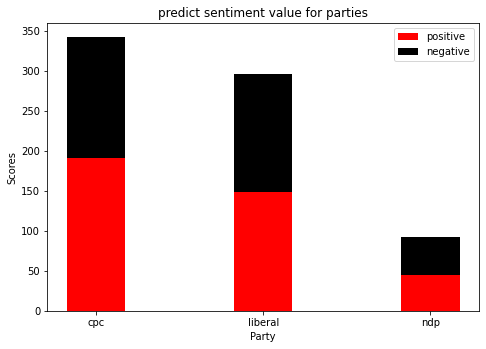

In [ ]:
# predict sentiment value for parties
positive = (191,149,45)
negative = (152,147,47)
ind = ('cpc','liberal','ndp')
# select plot factors
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, positive, width, color='r')
ax.bar(ind, negative, width, bottom = positive, color='black')
ax.set_ylabel('Scores')
ax.set_xlabel('Party')
ax.set_title('predict sentiment value for parties')
ax.set_xticks(ind, ('cpc','liberal','ndp'))
ax.legend(labels=['positive', 'negative'])
plt.show()

#### Discussion:

Based on the previous results about election sentiment prediction with genetic tweet trained best model, and the true and predict sentiment bar plots. We can find it's hard to use genetic tweet trained model in political parties. Because the election sentiment prediction accuracy is only about 50 persent, and the best genetice trained model is not the best model with other genetice data fitted model. 

In this assignment, the reason to lead the previous results can be the following factors: 

First, the text words feature of Canadian election data is different with the text words feature of genetic tweet data. 

Then, the Canadian election text dataframe in this part didn't remove the hashtag words, and these words have very high score in election data but not in genetic tweet data. 

Then, column factors are different between these two tweet dataframes. For Canadian election data, there are two more important factors: negative reason and party which genetic tweet data doesn't have.

However, when just simple apply the classification model to predict the election sentiment can get higher accuracy then using genetic trained model, which shows possibility to use NLP in political parties analyzation in during election campaigns

### For Canadian election negative reason prediction part:

#### Split the negative Canadian elections tweets into training data (70%) and test data (30%).

In [ ]:
Negative_party_df = elections_clean[elections_clean['sentiment'] == 0]
Negative_party_df

,sentiment,negative_reason,text,Party
0,0,Women Reproductive right and Racism,instead suggestion agree canadian women trus...,cpc
2,0,Economy,brantford going cost billion next years ask j...,liberal
4,0,Economy,canada taxpayers sick tired hard earned dona...,liberal
5,0,Others,canadavotes elxn cdnpoli facts blastfromth...,cpc
8,0,Others,chooseforward cdnpoli elxn ncanada make ame...,others
...,...,...,...,...
2125,0,Others,xe x x supervillain election failed jobs n n elxn,others
2126,0,Climate Problem,care limiting climatechange wondering party v...,others
2128,0,Scandal,know good enough job smearing campaign right ...,others
2129,0,Scandal,missed comment deflecting issue answer best re...,others


In [ ]:
Negative_party_df.negative_reason.value_counts()

Others                                 364
Scandal                                270
Tell lies                              198
Economy                                 51
Women Reproductive right and Racism     45
Climate Problem                         41
Separation                              16
Privilege                               12
Healthcare                               5
Healthcare and Marijuana                 4
Name: negative_reason, dtype: int64

Change negative reason Healthcare & Healthcare and Marijuana to 'Others' because of the low counts.

In [ ]:
Negative_party_df.loc[:,'negative_reason'] = Negative_party_df['negative_reason'].replace({'Healthcare': 'Others', 'Healthcare and Marijuana': 'Others'})
Negative_party_df.negative_reason.value_counts()

Others                                 373
Scandal                                270
Tell lies                              198
Economy                                 51
Women Reproductive right and Racism     45
Climate Problem                         41
Separation                              16
Privilege                               12
Name: negative_reason, dtype: int64

In [ ]:
#TF-IDF
tf_idf = TfidfVectorizer(max_features=500)
reason_tf_idf = tf_idf.fit_transform(Negative_party_df['text'])
reason_words_tf_idf = tf_idf.get_feature_names()
reason_weight_tf_idf = reason_tf_idf.toarray()
reason_tf_idf_df = pd.DataFrame(reason_weight_tf_idf, columns = reason_words_tf_idf)
reason_tf_idf_final = pd.concat([Negative_party_df.reset_index()['negative_reason'], reason_tf_idf_df],axis=1)


In [ ]:
#BW
reason_cv = CountVectorizer(max_features=500)
reason_bw = reason_cv.fit_transform(Negative_party_df['text'])
reason_words_bw = reason_cv.get_feature_names()
reason_weight_bw = reason_bw.toarray()
reason_bw_df = pd.DataFrame(reason_weight_bw, columns = reason_words_bw)
reason_bw_final = pd.concat([Negative_party_df.reset_index()['negative_reason'], reason_bw_df],axis=1)

In [ ]:
#BW
X_reason1_train, X_reason1_test, y_reason1_train, y_reason1_test = train_test_split(reason_bw_df, reason_bw_final['negative_reason'],test_size=0.3,random_state=10)

#TF-IDF
X_REASON1_train, X_REASON1_test, y_REASON1_train, y_REASON1_test = train_test_split(reason_tf_idf_df, reason_tf_idf_final['negative_reason'],test_size=0.3,random_state=10)


Multiclass Logistic regression

In [ ]:
#BW
from sklearn.linear_model import LogisticRegression
log_bw = LogisticRegression()
log_bw.fit(X_reason1_train, y_reason1_train)
predicted_log_bw= log_bw.predict(X_reason1_test)
print("Training accuracy of tf genetic:", log_bw.score(X_reason1_train, y_reason1_train))
print("Testing accuracy of tf genetic:", log_bw.score(X_reason1_test, y_reason1_test))
print(classification_report(y_reason1_test,predicted_log_bw))

Training accuracy of tf genetic: 0.9389204545454546
Testing accuracy of tf genetic: 0.5331125827814569
                                     precision    recall  f1-score   support

                    Climate Problem       1.00      0.28      0.43        18
                            Economy       0.58      0.41      0.48        17
                             Others       0.53      0.75      0.62       111
                          Privilege       0.00      0.00      0.00         2
                            Scandal       0.47      0.51      0.49        77
                         Separation       0.00      0.00      0.00         2
                          Tell lies       0.61      0.37      0.46        67
Women Reproductive right and Racism       0.67      0.25      0.36         8

                           accuracy                           0.53       302
                          macro avg       0.48      0.32      0.36       302
                       weighted avg       0.56  

In [ ]:
#TF-IDF
from sklearn.linear_model import LogisticRegression
log_tf = LogisticRegression()
log_tf.fit(X_REASON1_train, y_REASON1_train)
predicted_log_tf= log_tf.predict(X_REASON1_test)
print("Training accuracy of tf genetic:", log_tf.score(X_REASON1_train, y_REASON1_train))
print("Testing accuracy of tf genetic:", log_tf.score(X_REASON1_test, y_REASON1_test))
print(classification_report(y_REASON1_test,predicted_log_tf))

Training accuracy of tf genetic: 0.7372159090909091
Testing accuracy of tf genetic: 0.4867549668874172
                                     precision    recall  f1-score   support

                    Climate Problem       1.00      0.06      0.11        18
                            Economy       0.00      0.00      0.00        17
                             Others       0.45      0.77      0.57       111
                          Privilege       0.00      0.00      0.00         2
                            Scandal       0.48      0.53      0.50        77
                         Separation       0.00      0.00      0.00         2
                          Tell lies       0.73      0.28      0.41        67
Women Reproductive right and Racism       1.00      0.12      0.22         8

                           accuracy                           0.49       302
                          macro avg       0.46      0.22      0.23       302
                       weighted avg       0.54  

Decision
trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# for bag of words
dt_bw = DecisionTreeClassifier()
dt_bw.fit(X_reason1_train, y_reason1_train)
predicted_dt_bw = dt_bw.predict(X_reason1_test)
print("Training accuracy of bw genetic:", dt_bw.score(X_reason1_train, y_reason1_train))
print("Testing accuracy of bw genetic:", dt_bw.score(X_reason1_test, y_reason1_test))
print(classification_report(y_reason1_test,predicted_dt_bw))

Training accuracy of bw genetic: 0.9971590909090909
Testing accuracy of bw genetic: 0.4966887417218543
                                     precision    recall  f1-score   support

                    Climate Problem       0.82      0.50      0.62        18
                            Economy       0.41      0.41      0.41        17
                             Others       0.59      0.50      0.54       111
                          Privilege       0.00      0.00      0.00         2
                            Scandal       0.47      0.61      0.53        77
                         Separation       0.00      0.00      0.00         2
                          Tell lies       0.50      0.43      0.46        67
Women Reproductive right and Racism       0.16      0.38      0.22         8

                           accuracy                           0.50       302
                          macro avg       0.37      0.35      0.35       302
                       weighted avg       0.52  

In [ ]:
#TF-IDF
dt_tf = DecisionTreeClassifier()
dt_tf.fit(X_REASON1_train, y_REASON1_train)
predicted_dt_tf= dt_tf.predict(X_REASON1_test)
print("Training accuracy of tf genetic:", dt_tf.score(X_REASON1_train, y_REASON1_train))
print("Testing accuracy of tf genetic:", dt_tf.score(X_REASON1_test, y_REASON1_test))
print(classification_report(y_REASON1_test,predicted_dt_tf))

Training accuracy of tf genetic: 0.9971590909090909
Testing accuracy of tf genetic: 0.4966887417218543
                                     precision    recall  f1-score   support

                    Climate Problem       0.67      0.33      0.44        18
                            Economy       0.43      0.35      0.39        17
                             Others       0.56      0.62      0.59       111
                          Privilege       0.00      0.00      0.00         2
                            Scandal       0.45      0.52      0.48        77
                         Separation       0.00      0.00      0.00         2
                          Tell lies       0.47      0.39      0.43        67
Women Reproductive right and Racism       0.33      0.38      0.35         8

                           accuracy                           0.50       302
                          macro avg       0.36      0.32      0.34       302
                       weighted avg       0.50  

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# for bag of words
rf_bw = RandomForestClassifier()
rf_bw.fit(X_reason1_train, y_reason1_train)
predicted_rf_bw = rf_bw.predict(X_reason1_test)
print("Training accuracy of bw genetic:", rf_bw.score(X_reason1_train, y_reason1_train))
print("Testing accuracy of bw genetic:", rf_bw.score(X_reason1_test, y_reason1_test))
print(classification_report(y_reason1_test,predicted_rf_bw))

Training accuracy of bw genetic: 0.9971590909090909
Testing accuracy of bw genetic: 0.5894039735099338
                                     precision    recall  f1-score   support

                    Climate Problem       0.90      0.50      0.64        18
                            Economy       0.64      0.41      0.50        17
                             Others       0.56      0.74      0.64       111
                          Privilege       0.00      0.00      0.00         2
                            Scandal       0.58      0.57      0.58        77
                         Separation       0.00      0.00      0.00         2
                          Tell lies       0.65      0.49      0.56        67
Women Reproductive right and Racism       0.60      0.38      0.46         8

                           accuracy                           0.59       302
                          macro avg       0.49      0.39      0.42       302
                       weighted avg       0.60  

In [ ]:
#TF-IDF
rf_tf = RandomForestClassifier()
rf_tf.fit(X_REASON1_train, y_REASON1_train)
predicted_rf_tf= rf_tf.predict(X_REASON1_test)
print("Training accuracy of tf genetic:", rf_tf.score(X_REASON1_train, y_REASON1_train))
print("Testing accuracy of tf genetic:", rf_tf.score(X_REASON1_test, y_REASON1_test))
print(classification_report(y_REASON1_test,predicted_rf_tf))

Training accuracy of tf genetic: 0.9971590909090909
Testing accuracy of tf genetic: 0.5562913907284768
                                     precision    recall  f1-score   support

                    Climate Problem       0.88      0.39      0.54        18
                            Economy       0.60      0.35      0.44        17
                             Others       0.51      0.82      0.63       111
                          Privilege       0.00      0.00      0.00         2
                            Scandal       0.57      0.51      0.53        77
                         Separation       0.00      0.00      0.00         2
                          Tell lies       0.70      0.34      0.46        67
Women Reproductive right and Racism       0.50      0.25      0.33         8

                           accuracy                           0.56       302
                          macro avg       0.47      0.33      0.37       302
                       weighted avg       0.59  

#### Select best negative reason prediction model:

Based on the previos testing accuracy with three classification models and two feature engineering methods: the best untunned model is random forest in word of bag.

Hyperparameter tunning with Random Rorest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
def rf_tunning2(X_train,y_train,X_test,y_test):
    # Maximum number of levels in tree
    max_depth = [20, 50, 100, 200, 500]
    # Minimum number of samples required to split a node
    min_samples_split = [1, 5, 10, 20, 50]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 3, 4, 5]
    # Max features to consider when looking for the best split
    max_features = ['auto','sqrt']
    # Method of selecting samples for training each tree
    random_grid = {'max_depth': max_depth,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rf = RandomForestClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(rf, random_grid, cv = 5, verbose=2, random_state=10, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(X_train,y_train)
    best_rf = rf_random.best_estimator_
    predicted_rf_random= rf_random.predict(X_test)
    print('Best parameters found by randomised search:', rf_random.best_params_)
    print("Training accuracy of bw genetic:", rf_random.score(X_train,y_train))
    print("Testing accuracy of bw genetic:", rf_random.score(X_test,y_test))
    print(classification_report(y_test,predicted_rf_random))

In [ ]:
#BW
rf_tunning2(X_reason1_train, y_reason1_train, X_reason1_test, y_reason1_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.0s finished


Best parameters found by randomised search: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100}
Training accuracy of bw genetic: 0.9318181818181818
Testing accuracy of bw genetic: 0.5794701986754967
                                     precision    recall  f1-score   support

                    Climate Problem       1.00      0.56      0.71        18
                            Economy       0.75      0.35      0.48        17
                             Others       0.52      0.73      0.61       111
                          Privilege       0.00      0.00      0.00         2
                            Scandal       0.61      0.60      0.60        77
                         Separation       0.00      0.00      0.00         2
                          Tell lies       0.64      0.43      0.52        67
Women Reproductive right and Racism       0.50      0.38      0.43         8

                           accuracy                           0.58 

In [ ]:
# TF-IDF
rf_tunning2(X_REASON1_train, y_REASON1_train, X_REASON1_test, y_REASON1_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.1s finished


Best parameters found by randomised search: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 200}
Training accuracy of bw genetic: 0.9801136363636364
Testing accuracy of bw genetic: 0.5827814569536424
                                     precision    recall  f1-score   support

                    Climate Problem       0.89      0.44      0.59        18
                            Economy       0.80      0.47      0.59        17
                             Others       0.51      0.84      0.63       111
                          Privilege       0.00      0.00      0.00         2
                            Scandal       0.61      0.52      0.56        77
                         Separation       0.00      0.00      0.00         2
                          Tell lies       0.81      0.37      0.51        67
Women Reproductive right and Racism       0.50      0.25      0.33         8

                           accuracy                           0.58 

Hyperparameter tunning with Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
def lg_tunning (X_train,y_train,X_test,y_test):

    C_list = np.logspace(-2,2,20)
    solver_list =  ['newton-cg','lbfgs','liblinear','sag','saga']
    penalty = ['l1','l2']
    # define grid search
    parameter = {'C': C_list, 'penalty': penalty, 'solver':solver_list}
    grid_search = GridSearchCV(LogisticRegression(), parameter, cv=10, scoring = 'accuracy')
    grid_result = grid_search.fit(X_train,y_train)
  
    best_lg = grid_result.best_estimator_
    predicted_lg= grid_result.predict(X_test)
    print('Best parameters found by randomised search:', grid_result.best_params_)
    print("Training accuracy of bw genetic:", grid_result.score(X_train,y_train))
    print("Testing accuracy of bw genetic:", grid_result.score(X_test,y_test))
    print(classification_report(y_test,predicted_lg))

In [ ]:
#BW
lg_tunning(X_reason1_train, y_reason1_train, X_reason1_test, y_reason1_test)

Best parameters found by randomised search: {'C': 1.2742749857031335, 'penalty': 'l1', 'solver': 'liblinear'}
Training accuracy of bw genetic: 0.859375
Testing accuracy of bw genetic: 0.5562913907284768
                                     precision    recall  f1-score   support

                    Climate Problem       0.83      0.56      0.67        18
                            Economy       0.62      0.29      0.40        17
                             Others       0.54      0.74      0.62       111
                          Privilege       0.00      0.00      0.00         2
                            Scandal       0.48      0.52      0.50        77
                         Separation       0.00      0.00      0.00         2
                          Tell lies       0.66      0.40      0.50        67
Women Reproductive right and Racism       0.80      0.50      0.62         8

                           accuracy                           0.56       302
                         

In [ ]:
# TF-IDF
lg_tunning(X_REASON1_train, y_REASON1_train, X_REASON1_test, y_REASON1_test)

Best parameters found by randomised search: {'C': 1.2742749857031335, 'penalty': 'l1', 'solver': 'saga'}
Training accuracy of bw genetic: 0.671875
Testing accuracy of bw genetic: 0.5662251655629139
                                     precision    recall  f1-score   support

                    Climate Problem       0.89      0.44      0.59        18
                            Economy       0.80      0.24      0.36        17
                             Others       0.50      0.78      0.61       111
                          Privilege       0.00      0.00      0.00         2
                            Scandal       0.58      0.55      0.56        77
                         Separation       0.00      0.00      0.00         2
                          Tell lies       0.74      0.37      0.50        67
Women Reproductive right and Racism       0.71      0.62      0.67         8

                           accuracy                           0.57       302
                          macr

Hyperparameter tunning with Decision trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
def dt_tunning (X_train,y_train,X_test,y_test):

    # Maximum number of levels in tree
    max_depth = [10, 20, 50, 100]
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Max features to consider when looking for the best split
    max_features = ['auto','sqrt']
    # The function to measure the quality of a split
    criterion = ['gini', 'entropy']
    # Method of selecting samples for training each tree
    parameter = {'criterion': criterion,
               'max_depth': max_depth,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

    # define grid search
    grid_search = GridSearchCV(DecisionTreeClassifier(), parameter, cv=10, scoring = 'accuracy')
    grid_result = grid_search.fit(X_train,y_train)

    best_dt = grid_result.best_estimator_
    predicted_dt= grid_result.predict(X_test)
    print('Best parameters found by randomised search:', grid_result.best_params_)
    print("Training accuracy of bw genetic:", grid_result.score(X_train,y_train))
    print("Testing accuracy of bw genetic:", grid_result.score(X_test,y_test))
    print(classification_report(y_test,predicted_dt))  

In [ ]:
#BW
dt_tunning(X_reason1_train, y_reason1_train, X_reason1_test, y_reason1_test)

Best parameters found by randomised search: {'criterion': 'gini', 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
Training accuracy of bw genetic: 0.7116477272727273
Testing accuracy of bw genetic: 0.5
                                     precision    recall  f1-score   support

                    Climate Problem       0.90      0.50      0.64        18
                            Economy       0.17      0.12      0.14        17
                             Others       0.51      0.67      0.58       111
                          Privilege       0.00      0.00      0.00         2
                            Scandal       0.48      0.52      0.50        77
                         Separation       0.00      0.00      0.00         2
                          Tell lies       0.49      0.33      0.39        67
Women Reproductive right and Racism       0.67      0.50      0.57         8

                           accuracy                           

In [ ]:
# TF-IDF
dt_tunning(X_REASON1_train, y_REASON1_train, X_REASON1_test, y_REASON1_test)

Best parameters found by randomised search: {'criterion': 'gini', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5}
Training accuracy of bw genetic: 0.7457386363636364
Testing accuracy of bw genetic: 0.4470198675496689
                                     precision    recall  f1-score   support

                    Climate Problem       0.67      0.22      0.33        18
                            Economy       0.24      0.24      0.24        17
                             Others       0.46      0.70      0.56       111
                          Privilege       0.11      0.50      0.18         2
                            Scandal       0.45      0.31      0.37        77
                         Separation       0.00      0.00      0.00         2
                          Tell lies       0.49      0.31      0.38        67
Women Reproductive right and Racism       0.50      0.38      0.43         8

                           accuracy             

#### Discussion:
During this part analyzation. The best model to predict election negative reason is Random Forest Classifier with TF-IDF feature, the accuracy is about 0.583. The negative reason prediction accuracy is lower than the previoud election sentiment results. The NLP performence will change by different prediction target. The reason to lead this result can be size of training data, the taining data size of negative reason prediction is half of sentiment training data. 

## Questioin 5: Results

### Based on the first model answer the research question: 

“What can public opinion on Twitter tell us about the Canadian political landscape in 2019?”

From the fist model NLP analyzation, there are three output plots can help us to understandthe canadian political landscape.

First, the hashtag words frequency distribution figure shows which topics have more attention. This result also can shows which political party has a greater impact. Based on my understanding, "Liberal" and "Conservatives" have higher attention than "New Democratic Party".

Second, the negative and positive sentiment words frequency distribution plot by bar figure and word cloud. Both showed the key words people feel negative or positive sentiment.

Third, the party's sentiment frequency distribution shows how tweet's sentiment distribution for three diferent polotical parties. Which can shows people's perception and attitude for these different parties. Political party "Conservatives" and "Liberal" have higher negative score than negative, which means people has more negative sentiment for "Conservatives" and "Liberal".

#### For the first model performance and prediction part:

The first model trained by genetic tweet trining data, and the model use to predict sentiment target in genetic tweet data. The the best sentiment prediction model thought hyperparameter tunning is Random Fores tClassifier (TF-IDF feature) and parameters are:  {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 200}. The highest prediction accuracy can over 0.923 which is very high. 

However, when I applied the genetic tweet trained model to predict canadian election sentiment, the prediction accuracy is only about 50% which far lower then genetic tweet prediciton. Therefore, we cannot just do election sentiment prediction through genetic data trained model. 

When I aplied few classification model trained by election data to predict election sentiment. The accuracy over 0.71. Which means the tweet sentiment can be predicted through NLP when the data size is enough. But can not just use genetic tweet data to predict election sentiment. 

### Based on the second  model:

The best hyperparameter tunned model in election negative reason prediction is Random Forest Classifier with TF-IDF feature, the accuracy is about 0.583.The second model accuracy is lower than the element sentiment prediction model. Which means my second model fail to predict the correct negative reasons. The reason can be following factors:

First: Small training data size.

As shown in the learning curve below, the testing accuracy curve is till increace, and the distance between training curve and testing cureve is very high. Which means the model is underfitting, and the model prediction accuracy will increase with larger training data size.

Second: the target negative reasoon features:

During second model preparation part, I reported the negative reason distribution list, and the Healthcare & Healthcare and Marijuana counts are very small, for better prediction performance I changed negative reason Healthcare & Healthcare and Marijuana to 'Others' Beacouse of the low counts. Therefore, I can see the better target feature engineering method will improve the model performance.

Third: feature extractrion method:
        
The first and second model use bag od words and TF-IDF to do feature extractrion. Which are useful in binary classification, and confined in small data size and multi-class classification problem.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

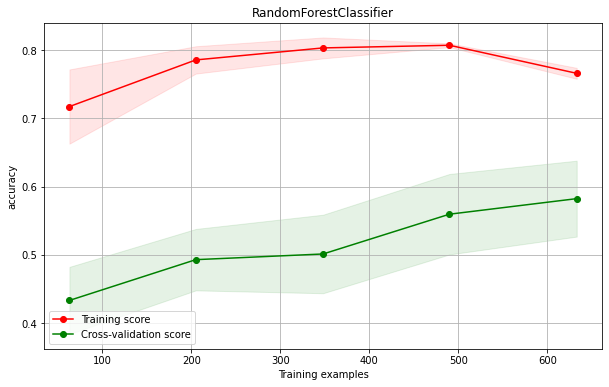

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt
plot_learning_curve(RandomForestClassifier(n_estimators=1000,min_samples_split=5,min_samples_leaf=2,max_features='sqrt',max_depth=50),'RandomForestClassifier', X_reason1_train, y_reason1_train, cv=10)

### Suggestion:

For both models, there are several suggestion can help increace prediction performance:

1. increase the election tweet sample size. which is most importance factor in this assignment.
2. increase the number of word features. Based on my computer limitation, I can support 500 features, more features will increase performance.